In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X,y = make_circles(n_samples=n_samples,
                   noise=0.03,
                   random_state=42)

In [2]:
import torch
from sklearn.model_selection import train_test_split

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train[:5]

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        [-0.9666, -0.2256],
        [-0.1666,  0.7994]])

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [4]:
from torch import nn

class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=20)
        self.layer_4 = nn.Linear(in_features=20, out_features=10)
        self.layer_5 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU()

    def forward(self, x):
        return self.layer_5(self.relu(self.layer_4(self.relu(self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))))))

model_1 = CircleModelV2().to(device)
model_1

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=20, bias=True)
  (layer_4): Linear(in_features=20, out_features=10, bias=True)
  (layer_5): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [5]:
def acuracy(y_true, y_pred):
    correct = torch.eq(y_true,y_pred).sum().item()
    acc = (correct/len(y_pred))*100
    return acc

In [6]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_1.parameters(), lr=0.1)

In [7]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 20000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    model_1.train()
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))
    loss = loss_fn(y_logits, y_train)
    acc = acuracy(y_true=y_train, y_pred=y_pred)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    model_1.eval()
    with torch.no_grad():
        test_logits = model_1(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        test_loss = loss_fn(test_logits, y_test)
        test_acc = acuracy(y_true=y_test, y_pred=test_pred)
    if epoch % 100 == 0:
        print(f"epoch: {epoch}, loss: {loss}, acc: {test_acc}, test_loss: {test_loss}")

epoch: 0, loss: 0.6938410997390747, acc: 50.0, test_loss: 0.6935749650001526
epoch: 100, loss: 0.6929699778556824, acc: 54.0, test_loss: 0.6928133368492126
epoch: 200, loss: 0.6927234530448914, acc: 53.0, test_loss: 0.6926252841949463
epoch: 300, loss: 0.6923738121986389, acc: 53.0, test_loss: 0.6923658847808838
epoch: 400, loss: 0.6918255686759949, acc: 54.50000000000001, test_loss: 0.691931962966919
epoch: 500, loss: 0.6910973191261292, acc: 55.00000000000001, test_loss: 0.691382110118866
epoch: 600, loss: 0.6900570392608643, acc: 54.50000000000001, test_loss: 0.6905720233917236
epoch: 700, loss: 0.6883477568626404, acc: 54.50000000000001, test_loss: 0.6892049908638
epoch: 800, loss: 0.6852008700370789, acc: 56.99999999999999, test_loss: 0.6865289211273193
epoch: 900, loss: 0.6779636144638062, acc: 60.0, test_loss: 0.6798960566520691
epoch: 1000, loss: 0.653441309928894, acc: 77.0, test_loss: 0.6578307747840881
epoch: 1100, loss: 0.5740382075309753, acc: 69.0, test_loss: 0.5742716789

In [8]:
model_1.eval()
with torch.no_grad():
    y_preds = torch.round(torch.sigmoid(model_1(X_test))).squeeze()
y_preds[:10], y_test[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'))

In [9]:
from helper_functions import *

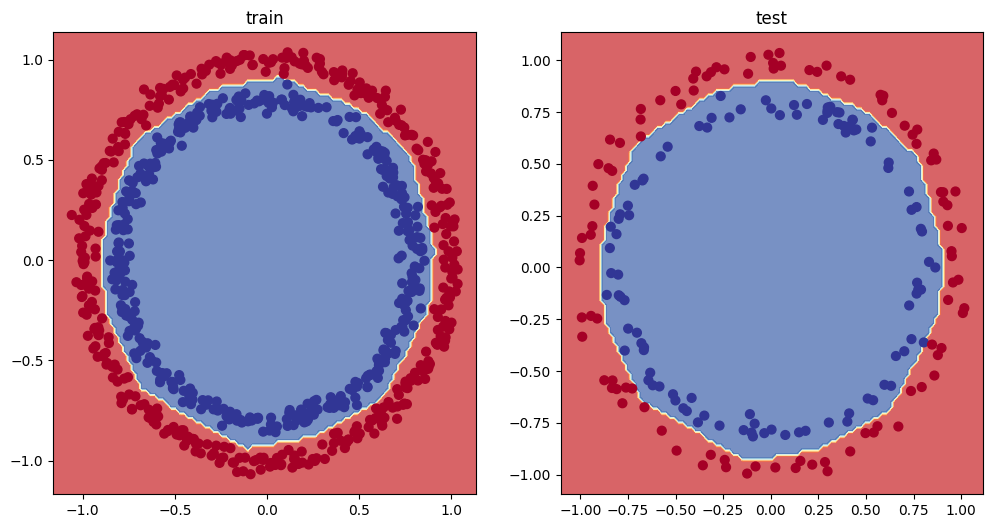

In [10]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title("train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("test")
plot_decision_boundary(model_1, X_test, y_test)

In [11]:
A = torch.arange(-10,10,1, dtype=torch.float32)

In [12]:
A.dtype

torch.float32

In [13]:
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

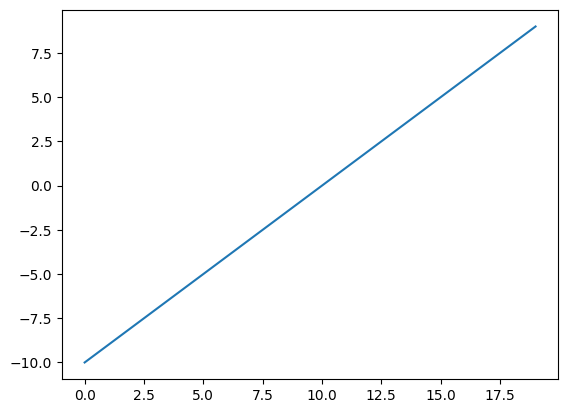

In [14]:
plt.plot(A)

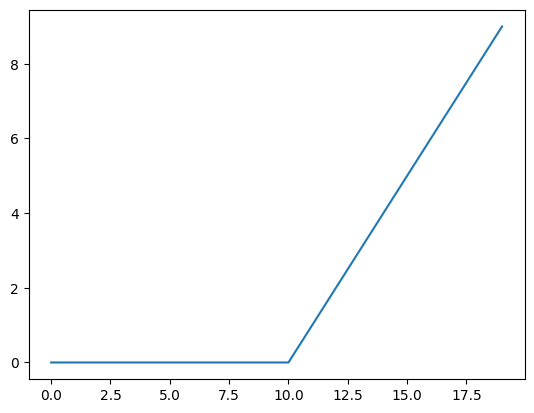

In [15]:
plt.plot(torch.relu(A))

In [16]:
def relu(x: torch.Tensor) -> torch.Tensor:
    return torch.maximum(torch.tensor(0),x)

In [17]:
relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

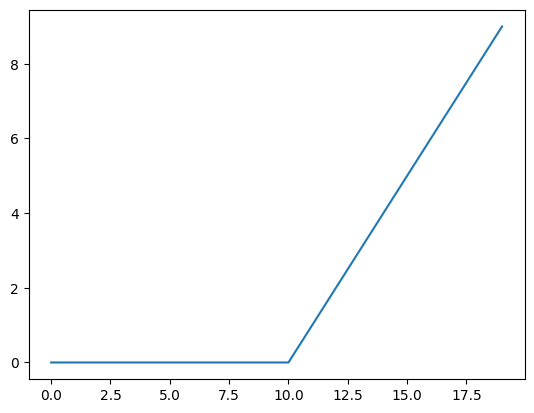

In [18]:
plt.plot(relu(A))

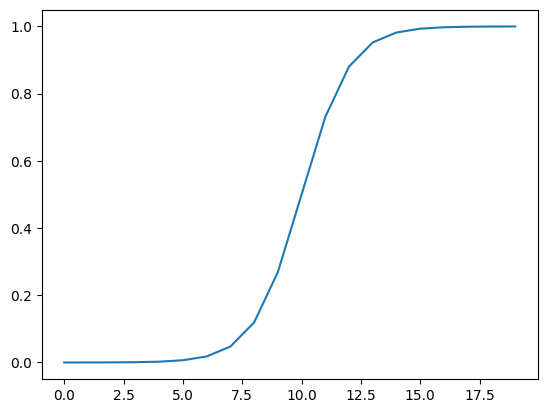

In [19]:
plt.plot(torch.sigmoid(A))

In [20]:
def sigmoid(x: torch.Tensor) -> torch.Tensor:
    return 1 / (1 + torch.exp(-x))

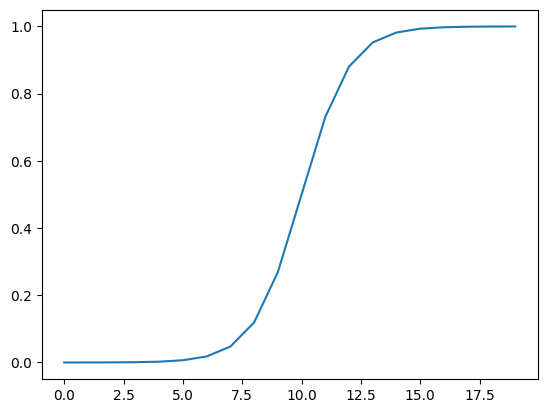

In [21]:
plt.plot(sigmoid(A))

In [22]:
from sklearn.datasets import make_blobs

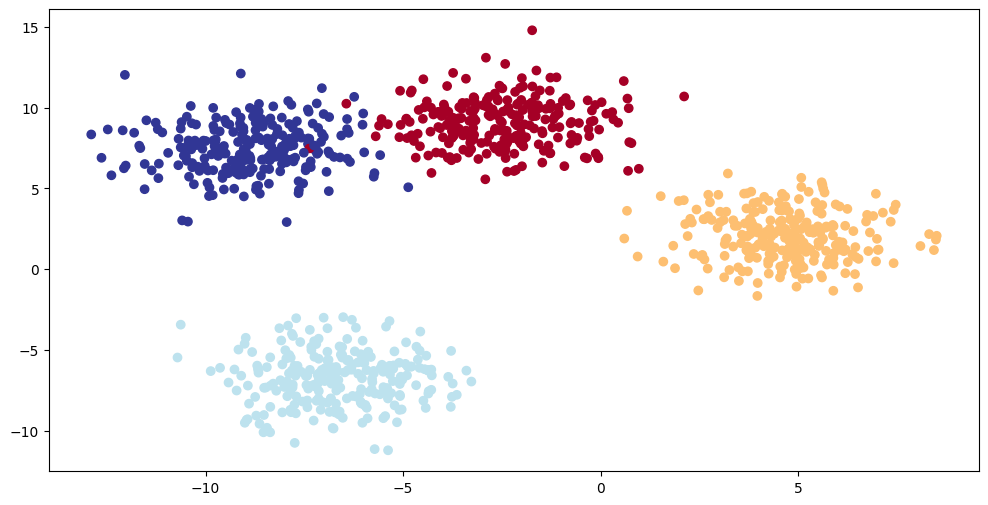

In [34]:
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=1.5,
                            random_state=RANDOM_SEED)

X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob, y_blob,
                                                                        test_size=0.2,
                                                                        random_state=RANDOM_SEED)
plt.figure(figsize=(12,6))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu)

In [35]:
class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_features),
        )

    def forward(self, x):
        return self.linear_layer_stack(x)

In [36]:
model = BlobModel(input_features=2, output_features=4, hidden_units=8).to(device)
model

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [37]:
loss_fn = torch.nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [39]:
torch.manual_seed(42)

torch.cuda.manual_seed(42)
epochs = 100

X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):
    model.train()

    y_logits = model(X_blob_train)
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

    loss = loss_fn(y_logits, y_blob_train)
    acc = acuracy(y_true=y_blob_train, y_pred=y_pred)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model.eval()
    with torch.inference_mode():
        test_logits = model(X_blob_test)
        test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)

        test_loss = loss_fn(test_logits, y_blob_test)
        test_acc = acuracy(y_true=y_blob_test, y_pred=test_pred)

    if epoch % 10 == 0:
        print(f"epoch: {epoch}, loss: {loss}, acc: {test_acc}, test_loss: {test_loss}, test_acc: {test_acc}")

epoch: 0, loss: 0.03184869512915611, acc: 99.5, test_loss: 0.022926408797502518, test_acc: 99.5
epoch: 10, loss: 0.030925225466489792, acc: 99.5, test_loss: 0.02186010032892227, test_acc: 99.5
epoch: 20, loss: 0.030171670019626617, acc: 99.5, test_loss: 0.020972194150090218, test_acc: 99.5
epoch: 30, loss: 0.029546553269028664, acc: 99.5, test_loss: 0.02022065967321396, test_acc: 99.5
epoch: 40, loss: 0.02902056649327278, acc: 99.5, test_loss: 0.01957572065293789, test_acc: 99.5
epoch: 50, loss: 0.028572561219334602, acc: 99.5, test_loss: 0.01901571825146675, test_acc: 99.5
epoch: 60, loss: 0.028186805546283722, acc: 99.5, test_loss: 0.01852443255484104, test_acc: 99.5
epoch: 70, loss: 0.027851460501551628, acc: 99.5, test_loss: 0.018089599907398224, test_acc: 99.5
epoch: 80, loss: 0.027557404711842537, acc: 99.5, test_loss: 0.017701704055070877, test_acc: 99.5
epoch: 90, loss: 0.027297521010041237, acc: 99.5, test_loss: 0.01735323667526245, test_acc: 99.5


In [41]:
model.eval()
with torch.inference_mode():
    y_logits = model(X_blob_test)
y_logits[:10]

tensor([[  5.4442,  13.0432, -17.8280, -11.7554],
        [  5.8881, -15.1900,   4.2523,  12.8026],
        [ -7.2237, -16.6245,  24.9488,  15.1842],
        [  2.3119,   9.5723, -10.3641,  -8.4612],
        [  9.9316,   4.0661, -17.2846,  -4.3220],
        [  6.5411, -18.8753,   6.2477,  15.9567],
        [ -7.6444, -12.6423,  22.3681,  11.7513],
        [  8.6298,  -1.0190, -11.2484,   0.2204],
        [ -7.3196, -23.2464,  30.4257,  20.9614],
        [  8.9504,   0.8413, -13.2247,  -1.4279]], device='cuda:0')

In [43]:
y_preds_probs = torch.softmax(y_logits, dim=1)
print(y_preds_probs)

tensor([[5.0068e-04, 9.9950e-01, 3.9135e-14, 1.6978e-11],
        [9.9218e-04, 6.9581e-13, 1.9327e-04, 9.9881e-01],
        [1.0656e-14, 8.8085e-19, 9.9994e-01, 5.7446e-05],
        [7.0234e-04, 9.9930e-01, 2.1949e-09, 1.4718e-08],
        [9.9717e-01, 2.8277e-03, 1.5099e-12, 6.4343e-07],
        [8.1431e-05, 7.4575e-16, 6.0721e-05, 9.9986e-01],
        [9.2419e-14, 6.2399e-16, 9.9998e-01, 2.4502e-05],
        [9.9971e-01, 6.4487e-05, 2.3274e-09, 2.2269e-04],
        [4.0493e-17, 4.9032e-24, 9.9992e-01, 7.7563e-05],
        [9.9967e-01, 3.0068e-04, 2.3407e-10, 3.1089e-05],
        [9.9481e-01, 1.0170e-05, 1.3801e-07, 5.1776e-03],
        [6.6855e-05, 9.9993e-01, 3.0819e-16, 1.9134e-13],
        [9.9929e-01, 7.0901e-04, 5.5006e-12, 2.3915e-06],
        [9.9993e-01, 4.1831e-05, 4.1206e-11, 2.4049e-05],
        [9.9995e-01, 4.9007e-05, 2.6384e-12, 4.4173e-06],
        [1.5609e-02, 1.5653e-10, 1.6641e-04, 9.8422e-01],
        [4.8455e-04, 1.6515e-13, 1.9594e-04, 9.9932e-01],
        [3.798

In [44]:
y_preds = torch.argmax(y_preds_probs, dim=1)

In [45]:
y_preds

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 0, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1], device='cuda:0')

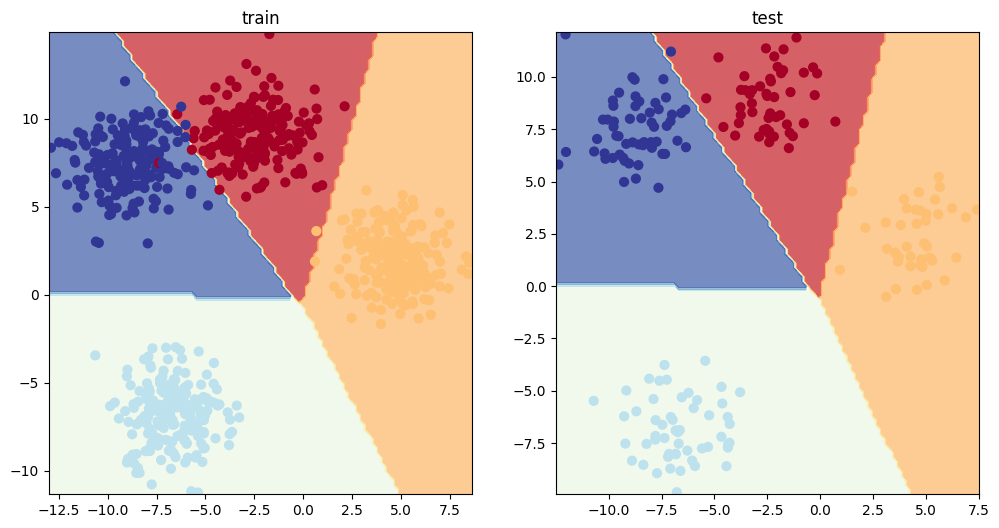

In [46]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title("train")
plot_decision_boundary(model, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("test")
plot_decision_boundary(model, X_blob_test, y_blob_test)


In [53]:
from torchmetrics import Accuracy
torchmetric_accuracy = Accuracy(task='multiclass',num_classes=4).to(device)
torchmetric_accuracy(y_preds, y_blob_test)

tensor(0.9950, device='cuda:0')

In [12]:
from sklearn.datasets import make_moons
X_blob, y_blob = make_moons(n_samples=1000,

                            random_state=42)
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.float)

In [13]:
from sklearn.model_selection import train_test_split

X_train,y_train,X_test,y_test = train_test_split(X_blob, y_blob,random_state=42,test_size=0.2)


In [14]:
import torch
from torch import nn

class Neura(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer = nn.Linear(in_features=2, out_features=4)
        self.layer1 = nn.Linear(in_features=4, out_features=8)
        self.layer2 = nn.Linear(in_features=8, out_features=1)
        self.relu = nn.ReLU()
    def forward(self, x):
        return self.layer2(self.relu(self.layer1(self.relu(self.layer(x)))))

In [15]:
model = Neura()

In [16]:
model.state_dict()

OrderedDict([('layer.weight',
              tensor([[-0.3809, -0.3354],
                      [-0.0968,  0.2768],
                      [ 0.4067,  0.0910],
                      [-0.0287,  0.2940]])),
             ('layer.bias', tensor([ 0.6250,  0.0765,  0.3462, -0.0942])),
             ('layer1.weight',
              tensor([[-0.2925,  0.0399, -0.0645,  0.1882],
                      [-0.1603,  0.4825,  0.0462,  0.1700],
                      [ 0.1074,  0.2325, -0.4385, -0.2242],
                      [-0.0098,  0.0626, -0.4725,  0.4396],
                      [ 0.1915, -0.0327,  0.3644, -0.0987],
                      [ 0.3234,  0.1477, -0.3317, -0.0410],
                      [-0.4659,  0.4207,  0.2598, -0.2723],
                      [ 0.2591,  0.0704, -0.4789, -0.2122]])),
             ('layer1.bias',
              tensor([ 0.3033,  0.0893, -0.3923, -0.1897,  0.2874, -0.2268,  0.1981,  0.2122])),
             ('layer2.weight',
              tensor([[-0.3381, -0.2674,  0.3343, -0.

In [17]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [18]:
epochs = 100
for epoch in range(epochs):
    model.train()
    y_logits = model(X_train)
    print(y_logits)
    break
    y_pred = torch.softmax(y_logits, dim=1)
    loss = loss_fn(y_logits, y_train)
    acc = acuracy(y_true=y_train, y_pred=y_pred)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

tensor([[-0.6087],
        [-0.5860],
        [-0.6118],
        [-0.6131],
        [-0.5515],
        [-0.6165],
        [-0.5489],
        [-0.5706],
        [-0.6028],
        [-0.5706],
        [-0.5462],
        [-0.6085],
        [-0.5740],
        [-0.6011],
        [-0.5768],
        [-0.6197],
        [-0.5942],
        [-0.6163],
        [-0.6086],
        [-0.5426],
        [-0.6089],
        [-0.6035],
        [-0.5555],
        [-0.5797],
        [-0.5418],
        [-0.5406],
        [-0.5957],
        [-0.6028],
        [-0.6024],
        [-0.6017],
        [-0.6135],
        [-0.5811],
        [-0.5893],
        [-0.6063],
        [-0.5518],
        [-0.6000],
        [-0.6138],
        [-0.5431],
        [-0.5502],
        [-0.5526],
        [-0.5498],
        [-0.5793],
        [-0.6210],
        [-0.5835],
        [-0.6217],
        [-0.6050],
        [-0.6162],
        [-0.5716],
        [-0.6205],
        [-0.6226],
        [-0.6144],
        [-0.5550],
        [-0.